In [1]:
import cv2
import numpy as np
img = cv2.imread('img.jpeg')
#black and white

 #cv2.imshow('First Image',img)
 
 #cv2.destroyAllWindows()

img.shape

(183, 275, 3)

In [2]:
img[0][0]

array([ 79,  82, 127], dtype=uint8)

In [3]:
img[0,0,0]

79

In [4]:
img[0,0,1]

82

In [5]:
img[0,0,2]

127

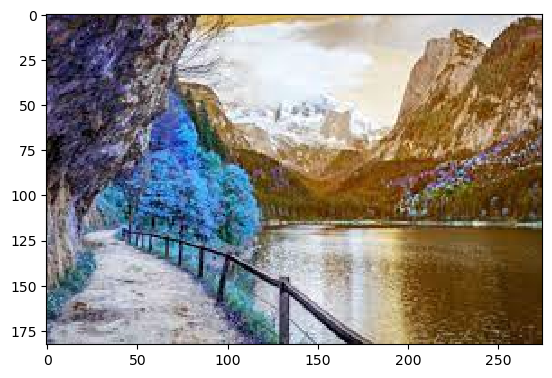

In [6]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [7]:
fix_image=cv2.cvtColor(img,cv2.COLOR_BGR2RGB);

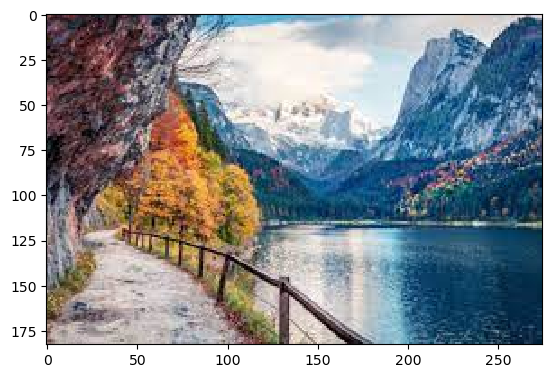

In [8]:
plt.imshow(fix_image)

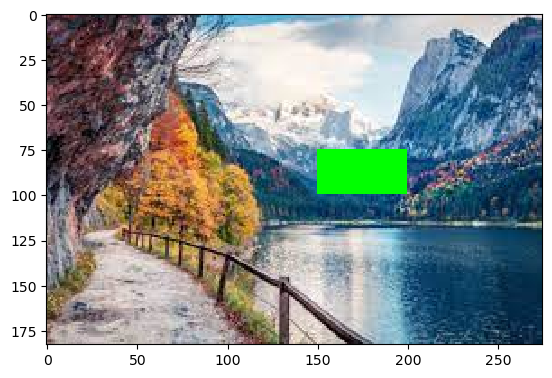

In [12]:
fix_image[75:100,150:200]=[0,255,0];
plt.imshow(fix_image)

In [ ]:
print(img.shape)

In [ ]:
import cv2
import os
import glob
b, g, r=cv2.split(img)
cv2.imshow("BLUE CHANNEL", b)
cv2.waitKey(0)

In [ ]:
merged = cv2.merge((b,g,r))
cv2.imshow("MERGED IMAGE",merged)
cv2.waitKey(0)

In [ ]:
img1= cv2.imread('img.jpeg')
img2= cv2.imread('Scenary.jpeg')
dist =cv2.addWeighted(img1,0.7,img2,0.3,0)


cv2.imshow("dist",dist)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:

img = cv2.imread('img.jpeg')
print(img.shape)

crop_image = img[int(183/2):,:]
cv2.imshow('CROPPED IMAGE',crop_image)

In [ ]:
import cv2
import numpy as np


kernel = np.ones((3,3))

# Compute the frame difference
def frame_diff(prev_frame, cur_frame, next_frame):
	diff_frames1 = cv2.absdiff(next_frame, cur_frame)
	# Absolute difference between current frame and previous frame
	diff_frames2 = cv2.absdiff(cur_frame, prev_frame)
	# Return the result of bitwise 'AND' between the above two resultant images
	return cv2.bitwise_and(diff_frames1, diff_frames2)

# Capture the frame from webcam
def get_frame(cap):
	ret, frame = cap.read()
	# Resize the image
	frame = cv2.resize(frame, None, fx=scaling_factor,
		fy=scaling_factor, interpolation=cv2.INTER_AREA)
	# Return the grayscale image
	return cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

if __name__=='__main__':
	cap = cv2.VideoCapture(0)
	scaling_factor = 0.9
	prev_frame = get_frame(cap)
	cur_frame = get_frame(cap)
	next_frame = get_frame(cap)
	# Iterate until the user presses the ESC key
	while True:
		frame_difference = frame_diff(prev_frame,cur_frame, next_frame)
		#frame_difference = cv2.dilate(src, kernel)
		_,frame_th = cv2.threshold(frame_difference, 0, 255, cv2.THRESH_TRIANGLE)
		# frame_th = cv2.dilate(frame_th, kernel)
		cv2.imshow("Object Movement", frame_difference)
		cv2.imshow("Obje", frame_th)
		
		# Update the variables
		prev_frame = cur_frame
		cur_frame = next_frame
		next_frame = get_frame(cap)
		# Check if the user pressed ESC
		key = cv2.waitKey(5)
		if key == 27:
			break
	cv2.destroyAllWindows()

In [ ]:
image = cv2.imread('img.jpg')

#Translation matrix
matrix = numpy.float32([[1,0,100],[0,1,100]])

#Applying the matrix to the image 
translated = cv2.warpAffine(image, matrix, (image.shape[1]+100,image.shape[0]+100))

#Showing the image
cv2.imshow('translation', translated)

In [ ]:
#Scaling operation
#Reading original Image
image = cv2.imread ('img.jpg')

image_sized = cv2.resize (image, (300,300))

#Resizing image using Linear interpolation
image_re_linear = cv2.resize (image, None, fx=5.5,fy=5.5, interpolation=cv2.INTER_LINEAR)

#Resizing using Cubic interpolation
image_re_cubic = cv2.resize (image, None, fx=5.5,fy=5.5, interpolation=cv2.INTER_CUBIC)

#Showing all three images
cv2.imshow('Linear', image_re_linear)
cv2.imshow('Cbubic', image_re_cubic)
cv2.imshow('original', image)

In [ ]:
import cv2
import numpy as np


#Import the image
img = cv2.imread('image.jpeg')

#Form the filters
kernel_identity = np.array([[0,0,0],[0,1,0],[0,0,0]])
kernel_3  = np.ones((3,3), dtype=np.float32) / 9.0
kernel_11 = np.ones((11,11), dtype=np.float32) / 121.0

#Applyt the filters
output1 = cv2.filter2D(img,-1,kernel_identity)
output2 = cv2.filter2D(img, -1, kernel_3)
output3 = cv2.filter2D(img,-1 , kernel_11)

#Show the image
cv2.imshow('same', output1)
cv2.imshow('3 blur', output2)
cv2.imshow('11 blur', output3)
cv2.waitKey(0)

In [ ]:
import cv2
import numpy as np

#reading a image from computer and taking dimensions
img = cv2.imread('image.jpeg')
rows, cols = img.shape[:2]

#Kernel Blurring using filter2D()
kernel_25 = np.ones((25,25), np.float32) / 625.0
output_kernel = cv2.filter2D(img, -1, kernel_25)

#Boxfilter and blur function blurring
output_blur = cv2.blur(img, (25,25))
output_box = cv2.boxFilter(img, -1, (5,5), normalize=False)

#gaussian Blur 
output_gaus = cv2.GaussianBlur(img, (5,5), 0)

#median Bur (reduction of noise)
output_med = cv2.medianBlur(img, 5)

#Bilateral filtering (Reduction of noise + Preserving of edges)

output_bil = cv2.bilateralFilter(img, 5, 6, 6)

cv2.imshow('kernel blur', output_kernel)
cv2.imshow('Blur() output', output_blur)
cv2.imshow('Box filter', output_box)
cv2.imshow('Gaussian', output_gaus)
cv2.imshow('Bilateral', output_bil)
cv2.imshow('Median Blur', output_med)
cv2.imshow('Original', img)
cv2.waitKey(0)

In [ ]:
import cv2
import numpy as np


image = cv2.imread('girl.jpeg')
image= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# performing the edge detetcion
gradients_sobelx = cv2.Sobel(image, -1, 1, 0)
gradients_sobely = cv2.Sobel(image, -1, 0, 1)
gradients_sobelxy = cv2.addWeighted(gradients_sobelx, 0.5, gradients_sobely, 0.5, 0)

gradients_laplacian = cv2.Laplacian(image, -1)

canny_output = cv2.Canny(image, 80, 150)

cv2.imshow('Sobel x', gradients_sobelx)
cv2.imshow('Sobel y', gradients_sobely)
cv2.imshow('Sobel X+y', gradients_sobelxy)
cv2.imshow('laplacian', gradients_laplacian)
cv2.imshow('Canny', canny_output)
cv2.waitKey()

In [ ]:
#contour
#Read the image and convert it to grayscale
image = cv2.imread('logo.png')
image = cv2.resize(image, None, fx=0.9,fy=0.9)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Now convert the grayscale image to binary image
ret, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

#Now detect the contours
contours, hierarchy = cv2.findContours(binary, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

#Visualize the data structure
print("Length of contours {}".format(len(contours)))
print(contours)

# draw contours on the original image
image_copy = image.copy()
image_copy = cv2.drawContours(image_copy, contours, -1, (0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

#Visualizing the results
cv2.imshow('Grayscale Image', gray)
cv2.imshow('Drawn Contours', image_copy)
cv2.imshow('Binary Image', binary)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#Fourier transform
import cv2
import numpy as np
from matplotlib import pyplot as plt

girl = cv2.imread('girl.jpeg',0)
f=np.fft.fft2(girl)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(girl , cmap ='gray')
plt.title('input'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum , cmap ='gray')
plt.title('magnitude_spectrum'),plt.xticks([]),plt.yticks([])
plt.show()

In [ ]:
#template matching

import cv2
import matplotlib.pyplot as plt

# 1st image
img= cv2.imread('logo.png')

#  template image
girl = cv2.imread('girl.jpeg')

plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('1st image')

plt.subplot(122)
plt.imshow(cv2.cvtColor(girl, cv2.COLOR_BGR2RGB))
plt.title('template image')

img_copy = img.copy()
res = cv2.matchTemplate(image=img_copy,
                        templ=girl,
                        method=cv2.TM_CCOEFF)

plt.subplot(121)
plt.imshow(res, cmap='hot')

plt.subplot(122)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
# finding location
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

# drawing rectangle
w, h, c = girl.shape

top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

cv2.rectangle(img=img_copy, 
              pt1=top_left, 
              pt2=bottom_right, 
              color=(0,0,255), 
              thickness=5);

plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))


In [ ]:
#hough transform
import cv2
import numpy as np

img = cv2.imread('grid.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    # x1 stores the rounded off value of (r * cos(theta) - 1000 * sin(theta))
    x1 = int(x0 + 1000 * (-b))
    # y1 stores the rounded off value of (r * sin(theta)+ 1000 * cos(theta))
    y1 = int(y0 + 1000 * (a))
    # x2 stores the rounded off value of (r * cos(theta)+ 1000 * sin(theta))
    x2 = int(x0 - 1000 * (-b))
    # y2 stores the rounded off value of (r * sin(theta)- 1000 * cos(theta))
    y2 = int(y0 - 1000 * (a))
    
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)


cv2.imshow('image', img)
k = cv2.waitKey(0)
cv2.destroyAllWindows()